In [211]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [212]:
# import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pickle
from sklearn.utils import shuffle

from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [213]:
# Create a blank Tokenizer with just English
nlp=English()
tokenizer = Tokenizer(nlp.vocab)

# Preprocessing

In [214]:
# Import data
post_data = pd.read_csv(r"post_data.csv")

In [215]:
data = pd.DataFrame(post_data)
display(data.head())
display(data.shape)

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


(22000, 12)

In [216]:
data[['City', 'State', 'other']] = data['joblocation_address'].str.split(', ', expand=True)

In [217]:
data = data.drop(columns = ['joblocation_address', 'jobid','uniq_id','site_name','shift','other'])

In [218]:
data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobtitle,postdate,skills,City,State
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,AUTOMATION TEST ENGINEER,1 hour ago,SEE BELOW,Atlanta,GA
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Information Security Engineer,1 week ago,"linux/unix, network monitoring, incident respo...",Chicago,IL
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Business Solutions Architect,2 weeks ago,"Enterprise Solutions Architecture, business in...",Schaumburg,IL
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Please see job description,Bolingbrook,IL
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,DevOps Engineer,48 minutes ago,"Configuration Management, Developer, Linux, Ma...",Atlanta,GA


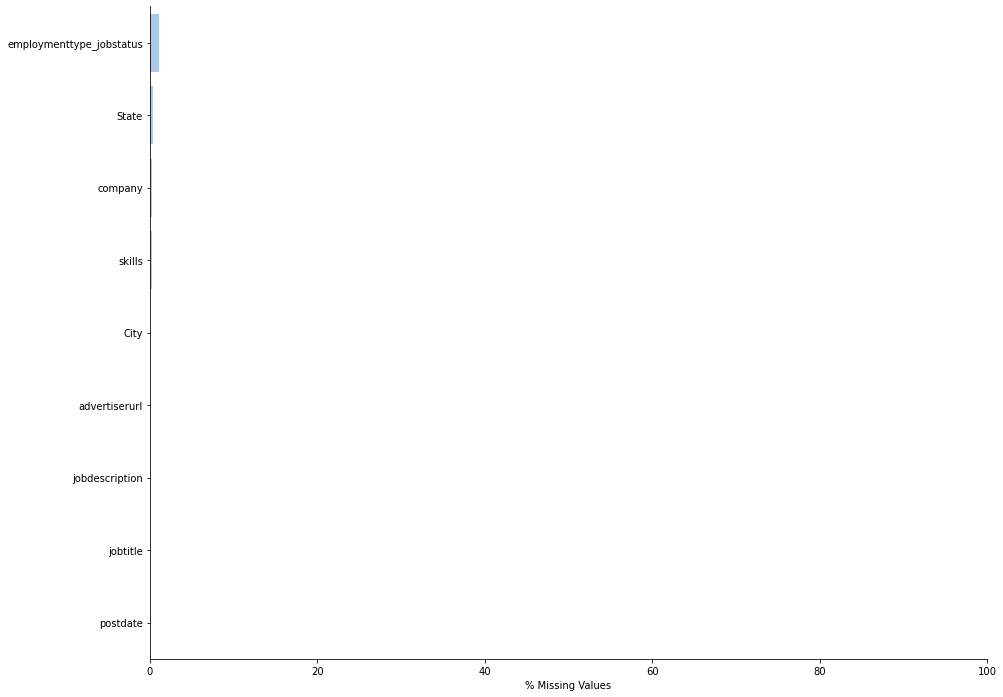

In [219]:
#plotting the percentage of missing values in each column
data_length = len(data)
data_null = (data.isnull().sum().sort_values(ascending=False)*100/len(data))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="% Missing Values")
sns.barplot(x=data_null.values, y=data_null.index, color="b")
sns.despine()

In [220]:
data.drop(data.loc[data['State'].isnull()].index,inplace=True)
data.drop(data.loc[data['company'].isnull()].index,inplace=True)
data.drop(data.loc[data['employmenttype_jobstatus'].isnull()].index,inplace=True)
data.drop(data.loc[data['skills'].isnull()].index,inplace=True)

In [221]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

display(missing_data.head(20))
display(data.shape)

,Total,Percent
advertiserurl,0,0.0
company,0,0.0
employmenttype_jobstatus,0,0.0
jobdescription,0,0.0
jobtitle,0,0.0
postdate,0,0.0
skills,0,0.0
City,0,0.0
State,0,0.0


(21612, 9)

In [222]:
#import jobs
jobs = pd.read_csv("jobs.csv")

In [223]:
jobs = pd.concat([jobs]*721, ignore_index=True)
jobs.head(100)

,Rank,Title
0,1,DevOps Engineer
1,2,Web Developer
2,3,Information Security Analyst
3,4,Data Scientist
4,5,Business Analyst
...,...,...
95,6,Software Developer
96,7,Software Engineer
97,8,Machine Learning Expert
98,9,Database Administrator


In [224]:
data = pd.concat([data, jobs], axis=1, join='inner')

In [225]:
data = data.drop(columns = ['Rank','jobtitle'])

In [226]:
data

,advertiserurl,company,employmenttype_jobstatus,jobdescription,postdate,skills,City,State,Title
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,1 hour ago,SEE BELOW,Atlanta,GA,DevOps Engineer
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,1 week ago,"linux/unix, network monitoring, incident respo...",Chicago,IL,Web Developer
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",2 weeks ago,"Enterprise Solutions Architecture, business in...",Schaumburg,IL,Information Security Analyst
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,2 weeks ago,Please see job description,Bolingbrook,IL,Data Scientist
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,48 minutes ago,"Configuration Management, Developer, Linux, Ma...",Atlanta,GA,Business Analyst
...,...,...,...,...,...,...,...,...,...
21625,https://www.dice.com/jobs/detail/Hyperion-%252...,"cyberThink, Inc.","Contract Corp-To-Corp, Contract Independent, C...",Must Have8+ years of experience working in an ...,2 weeks ago,"Hyperion, HFM, FDM, Upgrade or Deployment, Acc...",Sunnyvale,CA,IT Support
21626,https://www.dice.com/jobs/detail/Sr.-Product-M...,Blue Shield Of California,Full Time,The RoleBlue Shield of California is seeking ...,3 weeks ago,product manager consumer mobile andriod iOS ro...,San Francisco,CA,Designer
21627,https://www.dice.com/jobs/detail/Sr.-Technical...,Guidewire Software,"Full Time, perm",Senior Technical Product Manager - Application...,2 weeks ago,"product management, agile, java, enterprise ap...",San Mateo,CA,Data Architect
21628,https://www.dice.com/jobs/detail/Data-Quality-...,Etouch Systems Corp,"Contract W2, 12 months",W2 ONLYResponsibilities:Work with Data Enginee...,3 weeks ago,"Python, Vertica, Hadoop, SQL, ETL, Testing",Mountain View,CA,Financial Analyst


In [227]:
data['category'] = data['City'].str.cat(data[['State','Title']], sep=',')

In [228]:
data

,advertiserurl,company,employmenttype_jobstatus,jobdescription,postdate,skills,City,State,Title,category
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,1 hour ago,SEE BELOW,Atlanta,GA,DevOps Engineer,"Atlanta,GA,DevOps Engineer"
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,1 week ago,"linux/unix, network monitoring, incident respo...",Chicago,IL,Web Developer,"Chicago,IL,Web Developer"
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",2 weeks ago,"Enterprise Solutions Architecture, business in...",Schaumburg,IL,Information Security Analyst,"Schaumburg,IL,Information Security Analyst"
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,2 weeks ago,Please see job description,Bolingbrook,IL,Data Scientist,"Bolingbrook,IL,Data Scientist"
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,48 minutes ago,"Configuration Management, Developer, Linux, Ma...",Atlanta,GA,Business Analyst,"Atlanta,GA,Business Analyst"
...,...,...,...,...,...,...,...,...,...,...
21625,https://www.dice.com/jobs/detail/Hyperion-%252...,"cyberThink, Inc.","Contract Corp-To-Corp, Contract Independent, C...",Must Have8+ years of experience working in an ...,2 weeks ago,"Hyperion, HFM, FDM, Upgrade or Deployment, Acc...",Sunnyvale,CA,IT Support,"Sunnyvale,CA,IT Support"
21626,https://www.dice.com/jobs/detail/Sr.-Product-M...,Blue Shield Of California,Full Time,The RoleBlue Shield of California is seeking ...,3 weeks ago,product manager consumer mobile andriod iOS ro...,San Francisco,CA,Designer,"San Francisco,CA,Designer"
21627,https://www.dice.com/jobs/detail/Sr.-Technical...,Guidewire Software,"Full Time, perm",Senior Technical Product Manager - Application...,2 weeks ago,"product management, agile, java, enterprise ap...",San Mateo,CA,Data Architect,"San Mateo,CA,Data Architect"
21628,https://www.dice.com/jobs/detail/Data-Quality-...,Etouch Systems Corp,"Contract W2, 12 months",W2 ONLYResponsibilities:Work with Data Enginee...,3 weeks ago,"Python, Vertica, Hadoop, SQL, ETL, Testing",Mountain View,CA,Financial Analyst,"Mountain View,CA,Financial Analyst"


# FEATURE EXTRACTION via tfidf vectorizer
### Create a data-term matrix (vocabulary)

In [229]:
# Instantiate vecorizer object - call tokenize
tf_model = TfidfVectorizer(max_features=200,max_df=0.25,min_df=0.01,stop_words='english')

In [230]:
# create corpus (categories) used for the TF-IDF
corpus = data['category']

In [231]:
tf_matrix = tf_model.fit_transform(corpus).todense()
print('The shape of the matrix is:', tf_matrix.shape)
tf_df = pd.DataFrame(tf_matrix)
tf_df.columns = sorted(tf_model.vocabulary_)
display(tf_df.head())

The shape of the matrix is: (21245, 71)


,administrator,alpharetta,analyst,architect,atlanta,big,boston,business,ca,chicago,...,sunnyvale,support,technical,tester,tx,va,wa,washington,web,york
0,0.0,0.0,0.000000,0.0,0.534010,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.59753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503235,0.0
2,0.0,0.0,0.317766,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.341010,0.0,0.533227,0.0,0.0,0.612583,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [232]:
# Get cosine similarity of the matrix
cosine_sim = cosine_similarity(tf_matrix, tf_matrix)

In [278]:
# Fit on TF-IDF Vectors
nn = NearestNeighbors(n_neighbors=50, algorithm='ball_tree')
nn.fit(tf_matrix)

NearestNeighbors(algorithm='ball_tree', n_neighbors=50)

In [279]:
# Construct a reverse mapping of indices and post titles, and drop duplicate titles if any
indices = pd.Series(data.index, index=data['Title'])#.drop_duplicates()

In [280]:
print(type(indices))
print(type(cosine_sim))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [281]:
# Pickle the dtm and tf for use in the prediction
pickle.dump(tf_matrix, open('tf_matrix.pkl', 'wb'))
pickle.dump(tf_model, open('tf_model.pkl', 'wb'))
indices.to_pickle('indices.pkl')
np.save("cosine_sim.npy", cosine_sim)

# Test Case

In [266]:
# Create the test case
ideal_category = ['Atlanta,Developer']

new = tf_model.transform(ideal_category)
results = nn.kneighbors(new.todense())

In [267]:
# displays the cosine similarity on the top array and the index value on the bottom array
results

(array([[0.80665362, 0.80665362, 0.80665362, 0.80665362, 0.80665362,
         0.80665362, 0.80665362, 0.80665362, 0.80665362, 0.80665362]]),
 array([[6294, 6384, 6354, 6114, 6264, 6324, 6444, 6204, 6024, 6084]],
       dtype=int64))

In [268]:
# displays the title of the first value of the first array
data['Title'][results[1][0][0]]
# displays the category of the first value of the first array 
data['category'][results[1][0][0]]

'Atlanta,GA,Full Stack Developer'

In [288]:
def give_recommended_TF(ideal_categories):
    ideal_category = [ideal_categories]
    new = tf_model.transform(ideal_category)
    results = nn.kneighbors(new.todense())
    display(data['Title'][results[0][0][0]])
    display(data['category'][results[0][0][0]])

In [290]:
give_recommended_TF('analyst,Fairfield')

'Analyst'

'Fairfield,CT,Analyst'